# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [3]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Income Distribution by Loan Default Status')

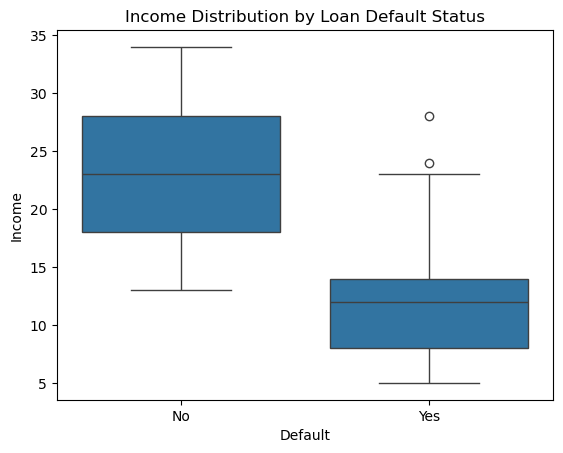

In [25]:
sns.boxplot(data=loan, x='Default', y='Income')
plt.title("Income Distribution by Loan Default Status")

Text(0.5, 1.0, 'Loan Amount Distribution by Loan Default Status')

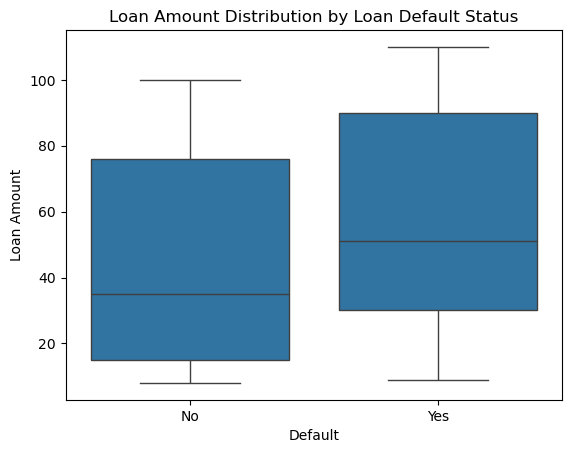

In [26]:
sns.boxplot(data=loan, x='Default', y='Loan Amount')
plt.title("Loan Amount Distribution by Loan Default Status")

Text(0.5, 1.0, 'Income vs. Loan Amount by Default Status')

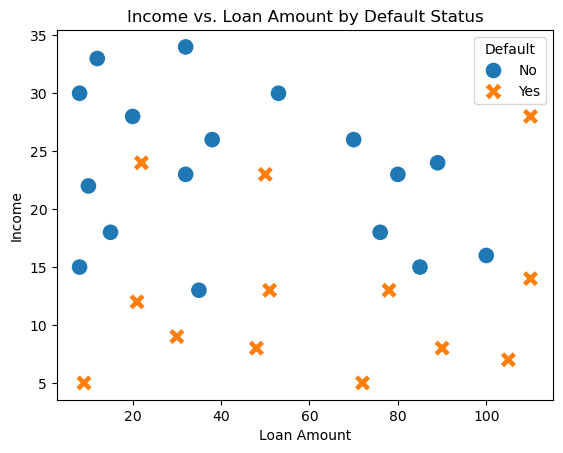

In [34]:
sns.scatterplot(data=loan, x='Loan Amount', y='Income', hue='Default', style='Default', s = 150)
import matplotlib.pyplot as plt
plt.title("Income vs. Loan Amount by Default Status")

## 3. Prepare the Data

In [8]:
y = loan[['Default']]

In [9]:
X = loan[['Income', 'Loan Amount']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234)

In [11]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [13]:
model = classifier.fit(X_train, y_train)

In [14]:
model.score(X_test, y_test)

0.5

## 5. Visualize the Classification Tree

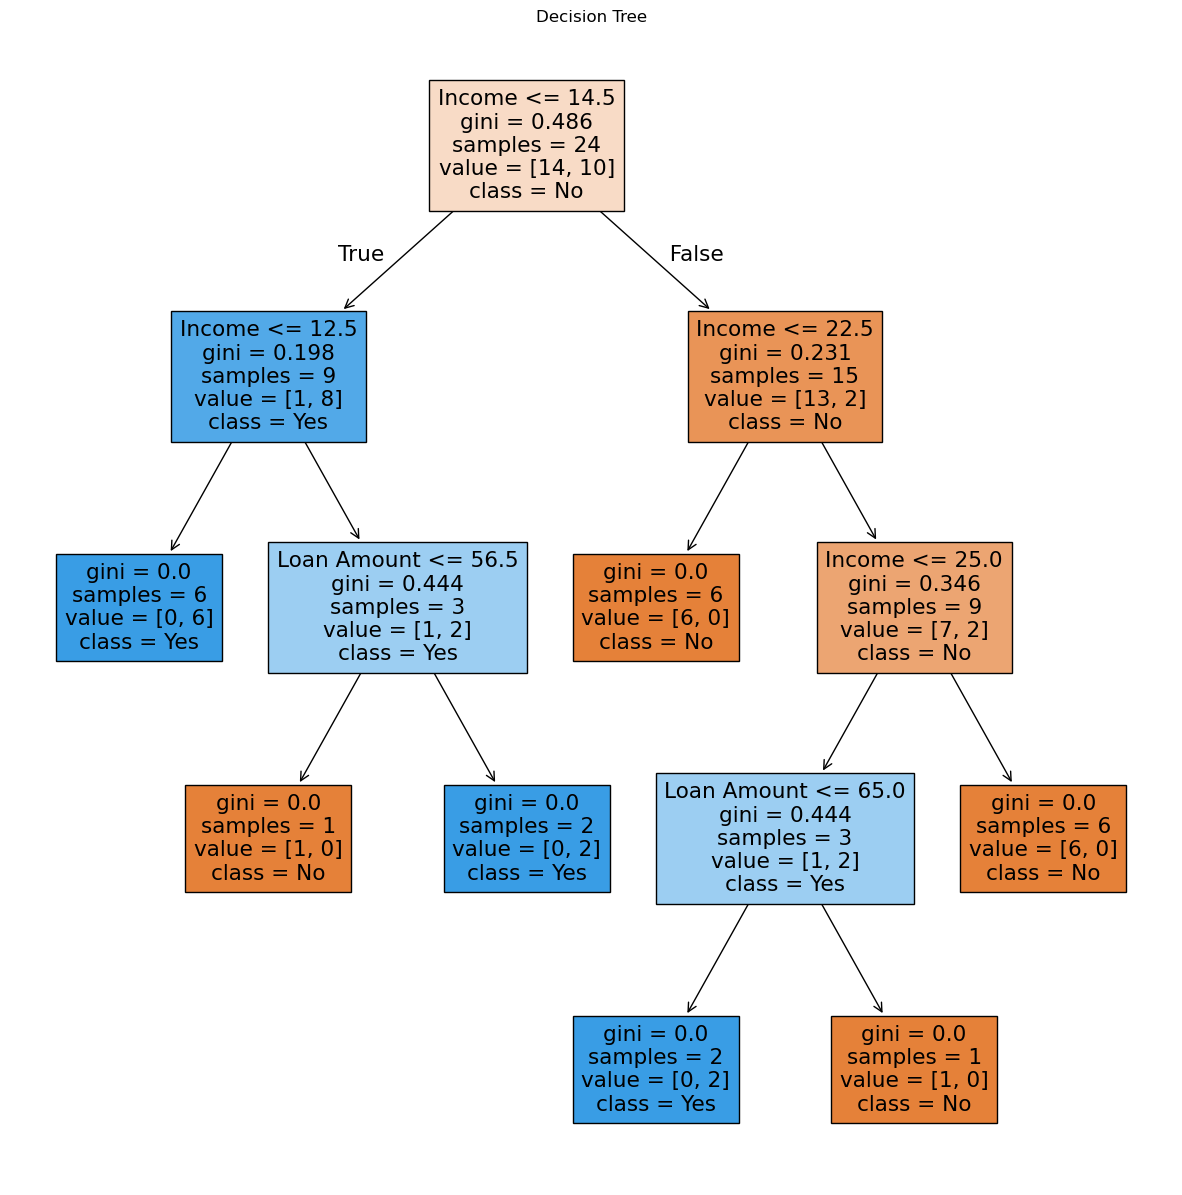

In [36]:
from sklearn import tree
plt.figure(figsize=(15, 15))
tree.plot_tree(model,
               feature_names=list(X.columns),
               class_names=['No', 'Yes'],
               filled=True)
plt.title("Decision Tree")
plt.show()


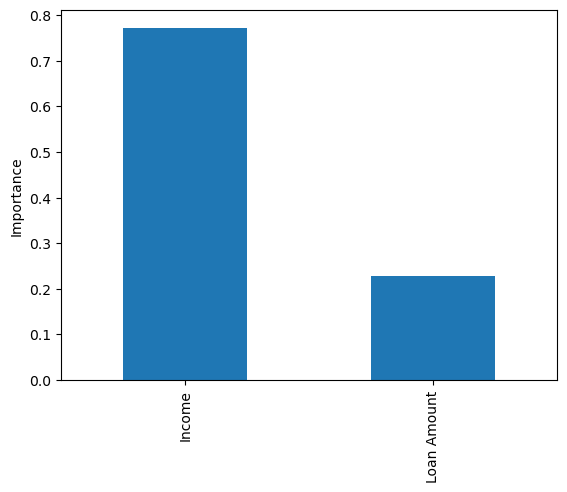

In [16]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

## 6. Prune the Classification Tree

In [37]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.5


In [39]:
param_grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [45]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [50]:
print("Pruned Test Accuracy:", best_model.score(X_test, y_test))

Pruned Test Accuracy: 0.8333333333333334


Text(0.5, 1.0, 'Decision Tree after Pruning')

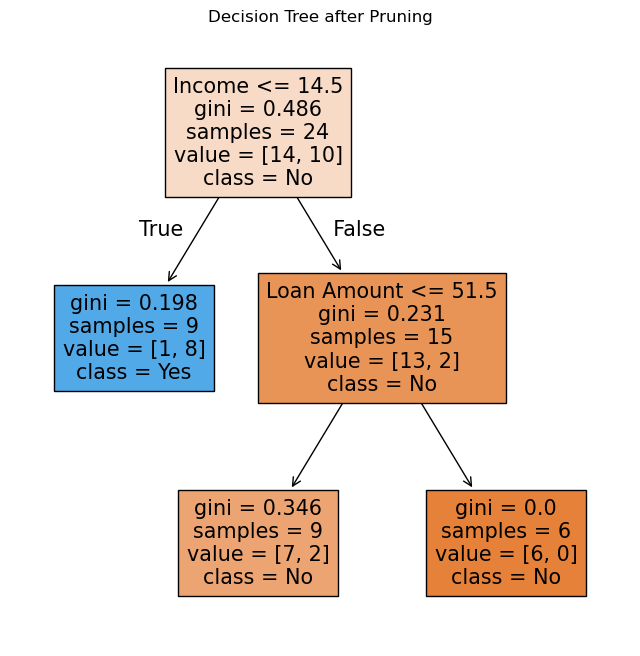

In [51]:
plt.figure(figsize = (8,8))
tree.plot_tree(best_model,
                   feature_names = list(X.columns),
                   class_names = ['No','Yes'],
                   filled = True)
plt.title("Decision Tree after Pruning")